# ADN_T012. Ligand Protein fingerprints

Authors:

* Adnane Aouidate, 2022, Structural Bioinformatics and Chemoinformatics, Institute of Organic and Analytical Chemistry (ICOA), Orléans, France.

## Aim of this talktorial

In the current tutorial we will learn how to use python combined with ODDT in order to calculate interaction fingerprints between a ligand and a protein.
Let's get statrted 

For more details :

https://oddt.readthedocs.io/en/latest/

https://github.com/oddt/oddt

In [19]:
from pathlib import Path
import oddt
import rdkit
from rdkit import Chem
from oddt import interactions

In [2]:
protein_path = Path('./PL', '5r82_proteinH.pdb')
ligand_path = Path('./PL', '5r82_ligandH.sdf')

oddt_prot = [x for x in oddt.toolkit.readfile('pdb', str(protein_path))][0]
oddt_prot.protein=True # protein flag needs to be on for the molecule to be treated as a protein

oddt_ligand = next(oddt.toolkit.readfile('sdf', str(ligand_path)))

# Now, to find the interacting atoms on the protein and ligand
prot_atoms, lig_atoms, strict = oddt.interactions.hbonds(oddt_prot, oddt_ligand)

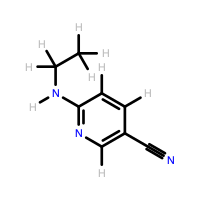

In [3]:
oddt_ligand

In [ ]:
#oddt_prot

In [4]:
# Get the protein atom involved in the first H-bond
p_at = prot_atoms[0]
p_at_resname = p_at['resname']
p_at_resnum = p_at['resnum']

In [20]:
# Map back to the atom in the protein object
main_struct_at = oddt_prot.atoms[p_at['id']]

In [21]:
main_struct_at.OBAtom

<openbabel.openbabel.OBAtom; proxy of <Swig Object of type 'OpenBabel::OBAtom *' at 0x7f79f2bfee10> >

In [25]:
# Map back to the atom in the protein object
main_struct_at = oddt_prot.atoms[p_at['id']]
# Get the underlying rdkit Atom object:
main_struct_at_rdk = main_struct_at.Atom
# Get the chain ID and PDB-format atom name
chain_id = main_struct_at_rdk.GetPDBResidueInfo().GetChainId()
atom_name = main_struct_at_rdk.GetPDBResidueInfo().GetName()

SyntaxError: invalid syntax (3263592044.py, line 4)

In [13]:
import pandas as pd 
import numpy as np

resis = []
resns = []
chains = []
atomns = []

for p_at in prot_atoms:
    resis.append(p_at['resnum'])
    resns.append(p_at['resname'])
    # Map back to the atom in the protein object
    main_struct_at = oddt_prot.atoms[p_at['id']]
    # Get the underlying rdkit Atom object:
    main_struct_at_rdk = main_struct_at.Atom
    # Get the chain ID and PDB-format atom name
    chains.append(main_struct_at_rdk.GetPDBResidueInfo().GetChainId())
    atomns.append(main_struct_at_rdk.GetPDBResidueInfo().GetName())

colnames = ['residue_number', 'residue_name', 'chain', 'atom']
prot_df = pd.DataFrame(data=np.array([resis, resns, chains, atomns]).T, columns = colnames)
prot_df

AttributeError: 'Atom' object has no attribute 'Atom'